<a href="https://colab.research.google.com/github/neelamku/DNN-ttH/blob/main/multi_class_0809_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install uproot3
!pip install uproot

     |████████████████████████████████| 117 kB 7.6 MB/s 
     |████████████████████████████████| 87 kB 5.7 MB/s 
     |████████████████████████████████| 289 kB 6.6 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import h5py
import numpy as np
import pandas as pd
import json
import os
import uproot3
import uproot

#root to arrays

tree = uproot3.open("/content/drive/MyDrive/Colab Notebooks/rnn_comb.root")["nominal_Loose_new"]
tree1 = uproot3.open("/content/drive/MyDrive/Colab Notebooks/rnn_rewg_latest.root")["nominal_Loose_new"]

m_truthpt_weights = tree1["truthpt_weights"].array()

m_higgs_truthPt = tree["higgs_truthPt"].array()
m_comb_higgs_truthPt = tree["comb_higgs_truthPt"].array()
m_best_higgs_Pt = tree["best_higgs_Pt"].array()
m_comb_best_higgs_Pt = tree["comb_best_higgs_Pt"].array()
m_best_higgs_Pt_withH = tree["best_higgs_Pt_withH"].array()
m_comb_best_higgs_Pt_withH = tree["comb_best_higgs_Pt_withH"].array()

m_nBTags_DL1r85 = tree["nBTags_DL1r85"].array()
m_nBTags_DL1r70 = tree["nBTags_DL1r70"].array()

m_higgs_pt = tree["comb_higgs_pt"].array()
m_higgs_mass = tree["comb_higgs_mass"].array()
m_hadW_mass = tree["comb_hadW_mass"].array()
m_hadtop_mass = tree["comb_hadtop_mass"].array()
m_leptop_mass = tree["comb_leptop_mass"].array()
m_hadWblepTop_mass = tree["comb_hadWblepTop_mass"].array()
m_minbhadTopqhadW_dR = tree["comb_minbhadTopqhadW_dR"].array()
m_hadWblepTop_dR = tree["comb_hadWblepTop_dR"].array()
m_blepTopbhadTop_dR = tree["comb_blepTopbhadTop_dR"].array()
m_bhadTopq2hadW_dR = tree["comb_bhadTopq2hadW_dR"].array()
m_hadWbhadTop_dR = tree["comb_hadWbhadTop_dR"].array()
m_Higgsq1hadW_mass = tree["comb_Higgsq1hadW_mass"].array()
m_bbHiggs_dR = tree["comb_bbHiggs_dR"].array()
m_bhadTopq1hadW_dR = tree["comb_bhadTopq1hadW_dR"].array()
m_qqhadW_dR = tree["comb_qqhadW_dR"].array()
m_diff_mindRbhadTopqhadW_dRlepblepTop = tree["comb_diff_mindRbhadTopqhadW_dRlepblepTop"].array()
m_lepbhadTop_dR = tree["comb_lepbhadTop_dR"].array()
m_lepb1Higgs_dR = tree["comb_lepb1Higgs_dR"].array()
m_lepWbhadTop_mass = tree["comb_lepWbhadTop_mass"].array()
m_lepblepTop_dR = tree["comb_lepblepTop_dR"].array()

In [ ]:
#prepare data###

in_higgs_truthPt = []
in_best_higgs_Pt = []
in_best_higgs_Pt_withH = []
in_comb_higgs_truthPt = []
in_comb_best_higgs_Pt = []
in_comb_best_higgs_Pt_withH = []

#20 variables for input

varList = []
in_higgs_pt = []
in_higgs_mass = []
in_hadW_mass = []
in_hadtop_mass = []
in_leptop_mass = []
in_hadWblepTop_mass = []
in_minbhadTopqhadW_dR = []
in_hadWblepTop_dR = []
in_blepTopbhadTop_dR = []
in_bhadTopq2hadW_dR = []
in_hadWbhadTop_dR = []
in_Higgsq1hadW_mass = []
in_bbHiggs_dR = []
in_bhadTopq1hadW_dR = []
in_qqhadW_dR = []
in_diff_mindRbhadTopqhadW_dRlepblepTop = []
in_lepbhadTop_dR = []
in_lepb1Higgs_dR = []
in_lepWbhadTop_mass = []
in_lepblepTop_dR = []

###
in_nBTags_DL1r85 = []
in_nBTags_DL1r70 = []

###
in_truthpt_weights = []

###count 
pass_no = 0
count = []

###
maxComb = max(len(l) for l in m_higgs_mass)
varOrder = [m_higgs_pt,m_higgs_mass,m_hadW_mass,m_hadtop_mass,m_leptop_mass,m_hadWblepTop_mass,m_minbhadTopqhadW_dR,m_hadWblepTop_dR,m_blepTopbhadTop_dR,m_bhadTopq2hadW_dR,m_hadWbhadTop_dR,m_Higgsq1hadW_mass,m_bbHiggs_dR,m_bhadTopq1hadW_dR,m_qqhadW_dR,m_diff_mindRbhadTopqhadW_dRlepblepTop,m_lepbhadTop_dR,m_lepb1Higgs_dR,m_lepWbhadTop_mass,m_lepblepTop_dR]
###put selections 

for i in range(0,len(m_higgs_truthPt)):
  if (m_higgs_truthPt[i]>0):
   if (m_nBTags_DL1r70[i]>=4):
    if (len(m_higgs_mass[i])>0):

      pass_no = pass_no + 1
      count.append(pass_no)

      ###fill inputs here

      in_higgs_truthPt.append(m_higgs_truthPt[i])
      in_best_higgs_Pt.append(m_best_higgs_Pt[i])
      in_best_higgs_Pt_withH.append(m_best_higgs_Pt_withH[i])
      in_comb_higgs_truthPt.append(m_comb_higgs_truthPt[i])
      in_comb_best_higgs_Pt.append(m_comb_best_higgs_Pt[i])
      in_comb_best_higgs_Pt_withH.append(m_comb_best_higgs_Pt_withH[i])

      ###
      in_higgs_pt.append(m_higgs_pt[i])
      in_higgs_mass.append(m_higgs_mass[i])
      in_hadW_mass.append(m_hadW_mass[i])
      in_hadtop_mass.append(m_hadtop_mass[i])
      in_leptop_mass.append(m_leptop_mass[i])
      in_hadWblepTop_mass.append(m_hadWblepTop_mass[i])
      in_minbhadTopqhadW_dR.append(m_minbhadTopqhadW_dR[i])
      in_hadWblepTop_dR.append(m_hadWblepTop_dR[i])
      in_blepTopbhadTop_dR.append(m_blepTopbhadTop_dR[i])
      in_bhadTopq2hadW_dR.append(m_bhadTopq2hadW_dR[i])
      in_hadWbhadTop_dR.append(m_hadWbhadTop_dR[i])
      in_Higgsq1hadW_mass.append(m_Higgsq1hadW_mass[i])
      in_bbHiggs_dR.append(m_bbHiggs_dR[i])
      in_bhadTopq1hadW_dR.append(m_bhadTopq1hadW_dR[i])
      in_qqhadW_dR.append(m_qqhadW_dR[i])
      in_diff_mindRbhadTopqhadW_dRlepblepTop.append(m_diff_mindRbhadTopqhadW_dRlepblepTop[i])
      in_lepbhadTop_dR.append(m_lepbhadTop_dR[i])
      in_lepb1Higgs_dR.append(m_lepb1Higgs_dR[i])
      in_lepWbhadTop_mass.append(m_lepWbhadTop_mass[i])
      in_lepblepTop_dR.append(m_lepblepTop_dR[i])

      ###

      in_truthpt_weights.append(m_truthpt_weights[i])

a1 = len(count)
print (a1)

73094


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

padded_input1 = tf.keras.preprocessing.sequence.pad_sequences(in_higgs_pt, padding="post",dtype='float32')
padded_input2 = tf.keras.preprocessing.sequence.pad_sequences(in_higgs_mass, padding="post",dtype='float32')
padded_input3 = tf.keras.preprocessing.sequence.pad_sequences(in_hadW_mass, padding="post",dtype='float32')
padded_input4 = tf.keras.preprocessing.sequence.pad_sequences(in_hadtop_mass, padding="post",dtype='float32')
padded_input5 = tf.keras.preprocessing.sequence.pad_sequences(in_leptop_mass, padding="post",dtype='float32')
padded_input6 = tf.keras.preprocessing.sequence.pad_sequences(in_hadWblepTop_mass, padding="post",dtype='float32')
padded_input7 = tf.keras.preprocessing.sequence.pad_sequences(in_minbhadTopqhadW_dR, padding="post",dtype='float32')
padded_input8 = tf.keras.preprocessing.sequence.pad_sequences(in_hadWblepTop_dR, padding="post",dtype='float32')
padded_input9 = tf.keras.preprocessing.sequence.pad_sequences(in_blepTopbhadTop_dR, padding="post",dtype='float32')
padded_input10 = tf.keras.preprocessing.sequence.pad_sequences(in_bhadTopq2hadW_dR, padding="post",dtype='float32')
padded_input11 = tf.keras.preprocessing.sequence.pad_sequences(in_hadWbhadTop_dR, padding="post",dtype='float32')
padded_input12 = tf.keras.preprocessing.sequence.pad_sequences(in_Higgsq1hadW_mass, padding="post")
padded_input13 = tf.keras.preprocessing.sequence.pad_sequences(in_bbHiggs_dR, padding="post",dtype='float32')
padded_input14 = tf.keras.preprocessing.sequence.pad_sequences(in_bhadTopq1hadW_dR, padding="post",dtype='float32')
padded_input15 = tf.keras.preprocessing.sequence.pad_sequences(in_qqhadW_dR, padding="post",dtype='float32')
padded_input16 = tf.keras.preprocessing.sequence.pad_sequences(in_diff_mindRbhadTopqhadW_dRlepblepTop, padding="post",dtype='float32')
padded_input17 = tf.keras.preprocessing.sequence.pad_sequences(in_lepbhadTop_dR, padding="post",dtype='float32')
padded_input18 = tf.keras.preprocessing.sequence.pad_sequences(in_lepb1Higgs_dR, padding="post",dtype='float32')
padded_input19 = tf.keras.preprocessing.sequence.pad_sequences(in_lepWbhadTop_mass, padding="post",dtype='float32')
padded_input20 = tf.keras.preprocessing.sequence.pad_sequences(in_lepblepTop_dR, padding="post",dtype='float32')

#print(padded_input20)

##other comb variables

padded_higgs_truthPt = tf.keras.preprocessing.sequence.pad_sequences(in_comb_higgs_truthPt, padding="post",dtype='float32')
padded_best_higgs_Pt = tf.keras.preprocessing.sequence.pad_sequences(in_comb_best_higgs_Pt, padding="post",dtype='float32')
padded_best_higgs_Pt_withH = tf.keras.preprocessing.sequence.pad_sequences(in_comb_best_higgs_Pt_withH, padding="post",dtype='float32')



In [ ]:
##signal 01

X_sig = np.copy((padded_input1,padded_input2,padded_input3,padded_input4,padded_input5,padded_input6,padded_input7,padded_input8,padded_input9,padded_input10,padded_input11,padded_input12,padded_input13,padded_input14,padded_input15,padded_input16,padded_input17,padded_input18,padded_input19,padded_input20))
X_sig_all_input = np.transpose(X_sig, (1, 2, 0))
print (X_sig_all_input.shape)

#mask zero from normalization
#uncomment if normalize

nz = np.any(X_sig_all_input, -1)
X_sig_all_input[nz] = StandardScaler().fit_transform(X_sig_all_input[nz])

#print(X_sig_all_input)


(73094, 24, 20)


In [ ]:
##signal 02 for checks!

X_sig_higgs_truthPt = np.copy(in_higgs_truthPt)
X_sig_best_higgs_pt_withH = np.copy(in_best_higgs_Pt_withH)
print (X_sig_best_higgs_pt_withH.shape)

#uncomment if normalize

#reshape

#X_sig_best_higgs_pt=X_sig_best_higgs_pt.reshape(-1,1)
#X_sig_best_higgs_pt_withH=X_sig_best_higgs_pt_withH.reshape(-1,1)
#print (X_sig_best_higgs_pt_withH.shape)

#X_sig_best_higgs_pt = StandardScaler().fit_transform(X_sig_best_higgs_pt)
#X_sig_best_higgs_pt_withH = StandardScaler().fit_transform(X_sig_best_higgs_pt_withH)

X_sig_higgs_truthPt =  X_sig_higgs_truthPt.reshape(73094,1,1)
print (X_sig_higgs_truthPt.shape)


(73094,)
(73094, 1, 1)


In [ ]:
##signal 03 for checks!

X_sig_comb_higgs_truthPt = np.copy(padded_higgs_truthPt)
X_sig_comb_best_higgs_pt = np.copy(padded_best_higgs_Pt )
X_sig_comb_best_higgs_pt_withH = np.copy(padded_best_higgs_Pt_withH)

print (X_sig_comb_best_higgs_pt_withH.shape)

#uncomment if normalize
#reshape

X_sig_comb_higgs_truthPt=X_sig_comb_higgs_truthPt.reshape(a1,24,1)
#X_sig_comb_best_higgs_pt=X_sig_comb_best_higgs_pt.reshape(a1,24,1)
X_sig_comb_best_higgs_pt_withH=X_sig_comb_best_higgs_pt_withH.reshape(a1,24,1)
#print (X_sig_comb_best_higgs_pt_withH.shape)

#mask zero from normalization

nz1 = np.any(X_sig_comb_higgs_truthPt, axis=-1)
#nz2 = np.any(X_sig_comb_best_higgs_pt, axis=-1)
nz3 = np.any(X_sig_comb_best_higgs_pt_withH, axis=-1)

X_sig_comb_higgs_truthPt[nz1] = StandardScaler().fit_transform(X_sig_comb_higgs_truthPt[nz1])
#X_sig_comb_best_higgs_pt[nz2] = StandardScaler().fit_transform(X_sig_comb_best_higgs_pt[nz2])
X_sig_comb_best_higgs_pt_withH[nz3] = StandardScaler().fit_transform(X_sig_comb_best_higgs_pt_withH[nz3])

X_sig_comb_higgs_truthPt=X_sig_comb_higgs_truthPt.reshape(73094, 24,1)
X_sig_comb_best_higgs_pt_withH= X_sig_comb_best_higgs_pt_withH.reshape(73094, 24,1)
#print(X_sig_comb_best_higgs_pt[:20])

(73094, 24)


In [ ]:
##target

Y_sig = np.copy(in_higgs_truthPt)
print (Y_sig.shape)

##weights
rewg_weights = np.copy(in_truthpt_weights)

(73094,)


In [ ]:
y_classes_truth = []

for j in range(0,len(Y_sig)):
  if Y_sig[j]>=0 and Y_sig[j]<=120000:
    y_classes_truth.append(0)
  if Y_sig[j]>120000 and Y_sig[j]<=200000:
    y_classes_truth.append(1)  
  if Y_sig[j]>200000 and Y_sig[j]<=300000:
    y_classes_truth.append(2) 
  if Y_sig[j]>300000 and Y_sig[j]<=450000:
    y_classes_truth.append(3)   
  if Y_sig[j]>450000:
    y_classes_truth.append(4)   

print (y_classes_truth)
print (Y_sig)
Y_sig_class = np.copy(y_classes_truth)
print (Y_sig_class.shape)

[0, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 3, 0, 1, 3, 0, 0, 1, 0, 0, 1, 1, 0, 3, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 3, 3, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 3, 2, 3, 0, 1, 1, 3, 1, 0, 0, 0, 0, 1, 3, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 3, 0, 0, 2, 4, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 3, 0, 3, 1, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 3, 3, 0, 0, 0, 2, 3, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 4, 1, 4, 0, 1, 0, 0, 1, 0, 3, 0, 0, 3, 4, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 3, 0, 1, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2, 3, 1, 0, 0, 1, 3, 3, 0, 0, 0, 0, 1, 0, 4, 2, 2, 2, 2, 1, 3, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 1, 2, 1, 0, 0, 1, 1, 3, 1, 0, 1, 0, 1, 1, 0, 0, 2, 3, 1, 1, 0, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 3, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 

In [ ]:
from keras.utils import np_utils
Y_sig_class_cat = np_utils.to_categorical(Y_sig_class, 5)

print (y_classes_truth[:10])
print (Y_sig[:10])
print (Y_sig_class_cat[:10])


[0, 0, 0, 3, 0, 1, 1, 0, 1, 1]
[ 52693.44   71551.68   48297.176 385140.8    60902.867 199532.
 154697.42   58685.715 199304.45  185179.78 ]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
##split data: train ans test

from sklearn.model_selection import train_test_split

#signal 01
X_train_all_input, X_test_all_input, Y_train_01, Y_test_01, rewg_train_01, rewg_test_01 =  train_test_split(X_sig_all_input, Y_sig_class_cat, rewg_weights, test_size=0.50, random_state=42 )

#signal 02 for checks only
X_train_higgs_truthPt, X_test_higgs_truthPt, Y_train_02a, Y_test_02a, rewg_train_02a, rewg_test_02a =  train_test_split(X_sig_higgs_truthPt, Y_sig_class_cat, rewg_weights, test_size=0.50, random_state=42 )

X_train_best_higgs_pt_withH, X_test_best_higgs_pt_withH, Y_train_02b, Y_test_02b, rewg_train_02b, rewg_test_02b =  train_test_split(X_sig_best_higgs_pt_withH, Y_sig_class_cat, rewg_weights, test_size=0.50, random_state=42 )

#signal 03 for checks only
X_train_comb_higgs_truthPt, X_test_comb_higgs_truthPt, Y_train_03a, Y_test_03a, rewg_train_03a, rewg_test_03a =  train_test_split(X_sig_comb_higgs_truthPt, Y_sig_class_cat, rewg_weights, test_size=0.50, random_state=42 )
X_train_comb_best_higgs_pt, X_test_comb_best_higgs_pt, Y_train_03b, Y_test_03b, rewg_train_03b, rewg_test_03b =  train_test_split(X_sig_comb_best_higgs_pt, Y_sig_class_cat, rewg_weights, test_size=0.50, random_state=42 )
X_train_comb_best_higgs_pt_withH, X_test_comb_best_higgs_pt_withH, Y_train_03c, Y_test_03c, rewg_train_03c, rewg_test_03c =  train_test_split(X_sig_comb_best_higgs_pt_withH, Y_sig_class_cat, rewg_weights, test_size=0.50, random_state=42 )

print (X_train_all_input.shape)
print (X_train_best_higgs_pt_withH.shape)
print (X_train_comb_best_higgs_pt_withH.shape)

(36547, 24, 20)
(36547,)
(36547, 24, 1)


In [ ]:
#prepare model here
## import functions

import keras
import tensorflow as tf
from keras.layers import BatchNormalization, Layer, TimeDistributed, Dropout
from keras.layers import Dense, Input, ReLU, Masking, LSTM, Embedding, Lambda, Bidirectional, Flatten
from keras.models import Model

from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers.experimental import preprocessing
from keras import backend as K
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import matplotlib as mpl
from numpy.polynomial.polynomial import polyfit
import statsmodels.api as sm

#from numpy.random import seed
#seed(1)
#import tensorflow
#tensorflow.random.set_seed(2)


In [ ]:
in_inputs = Input(shape=(1,1),name="in_inputs")
masked_input = Masking(mask_value=0)(in_inputs)

# Feed this merged layer to an RNN
lstm = LSTM(100, return_sequences=False, name='LSTM')(masked_input)
dpt = Dropout(rate=0.2)(lstm)

my_inputs = in_inputs

# Fully connected layer
FC = Dense(20, activation='relu', name="Dense")(dpt)

# Softmax for classification
output = Dense(5, activation='softmax', name="output")(FC)
rnnip1 = Model(inputs=my_inputs, outputs=output)


In [ ]:
opt = Adam(learning_rate=0.1)
rnnip1.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
earlyStop = EarlyStopping(monitor='val_loss', verbose=True, patience=10)
rnnip_mChkPt = ModelCheckpoint('rnnip_weights.h5',monitor='val_loss', verbose=True,
                               save_best_only=True,
                               save_weights_only=True)
nEpochs = 2000

rnnip_hist = rnnip1.fit(X_train_higgs_truthPt,Y_train_02b, epochs=nEpochs, batch_size=256,validation_split=0.2,
                 callbacks=[earlyStop, rnnip_mChkPt])

Epoch 1/2000
115/115 [==============================] - 5s 18ms/step - loss: 1.3005 - accuracy: 0.4792 - val_loss: 1.2448 - val_accuracy: 0.4821

Epoch 00001: val_loss improved from inf to 1.24476, saving model to rnnip_weights.h5
Epoch 2/2000
115/115 [==============================] - 1s 8ms/step - loss: 1.2394 - accuracy: 0.4871 - val_loss: 1.2424 - val_accuracy: 0.4821

Epoch 00002: val_loss improved from 1.24476 to 1.24241, saving model to rnnip_weights.h5
Epoch 3/2000
115/115 [==============================] - 1s 8ms/step - loss: 1.2380 - accuracy: 0.4871 - val_loss: 1.2408 - val_accuracy: 0.4821

Epoch 00003: val_loss improved from 1.24241 to 1.24078, saving model to rnnip_weights.h5
Epoch 4/2000
115/115 [==============================] - 1s 8ms/step - loss: 1.2381 - accuracy: 0.4871 - val_loss: 1.2426 - val_accuracy: 0.4821

Epoch 00004: val_loss did not improve from 1.24078
Epoch 5/2000
115/115 [==============================] - 1s 8ms/step - loss: 1.2391 - accuracy: 0.4871 - v

In [ ]:
keras.backend.clear_session()

In [ ]:
test_loss, test_acc = rnnip1.evaluate(X_test_comb_higgs_truthPt,  Y_test_01, verbose=2)

print('\nTest accuracy:', test_acc)

1143/1143 - 23s - loss: 0.8937 - accuracy: 0.5449

Test accuracy: 0.5448600649833679


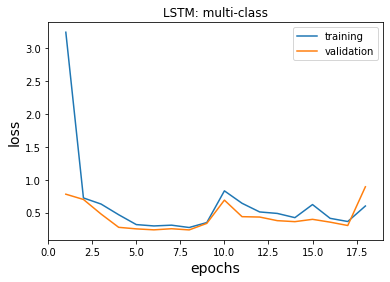

In [ ]:
#plot###

import matplotlib.pyplot as plt

epochs = np.arange(1,len(rnnip_hist.history['loss'])+1)

plt.plot(epochs,rnnip_hist.history['loss'],label='training')
plt.plot(epochs,rnnip_hist.history['val_loss'],label='validation')
plt.xlim([0, len(rnnip_hist.history['loss'])+1])
plt.xlabel('epochs',fontsize=14)
plt.ylabel('loss',fontsize=14)
plt.legend()
plt.title('LSTM: multi-class')
plt.show()

In [ ]:
print (Y_test_01[:10])

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
ypred = rnnip1.predict(X_test_comb_higgs_truthPt, batch_size=256)
print (ypred[:10])

[[2.3633227e-02 4.6321359e-01 3.2672068e-01 1.4259829e-01 4.3834250e-02]
 [2.3633227e-02 4.6321359e-01 3.2672068e-01 1.4259829e-01 4.3834250e-02]
 [1.0416610e-01 8.9583379e-01 6.8112477e-08 8.1345952e-09 3.0834246e-09]
 [8.0526698e-01 1.9473305e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.3633227e-02 4.6321359e-01 3.2672068e-01 1.4259829e-01 4.3834250e-02]
 [2.3633227e-02 4.6321359e-01 3.2672068e-01 1.4259829e-01 4.3834250e-02]
 [8.0992573e-01 1.9007427e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.3633227e-02 4.6321359e-01 3.2672068e-01 1.4259829e-01 4.3834250e-02]
 [6.3012892e-01 3.6987099e-01 5.5374135e-31 9.6880599e-34 7.2691528e-34]
 [3.7852618e-01 6.2147385e-01 4.6596905e-22 4.1119860e-24 2.3750736e-24]]


In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix


target_names = ['0-120', '120-200','200-300','300-450','450-']
print(classification_report(np.argmax(Y_test_01, axis=1), ypred.argmax(axis=1), target_names=target_names))


              precision    recall  f1-score   support

       0-120       0.76      0.78      0.77     18033
     120-200       0.53      0.59      0.56     10247
     200-300       0.60      0.42      0.50      5371
     300-450       0.60      0.63      0.61      2303
        450-       0.64      0.60      0.62       593

    accuracy                           0.66     36547
   macro avg       0.63      0.60      0.61     36547
weighted avg       0.66      0.66      0.66     36547



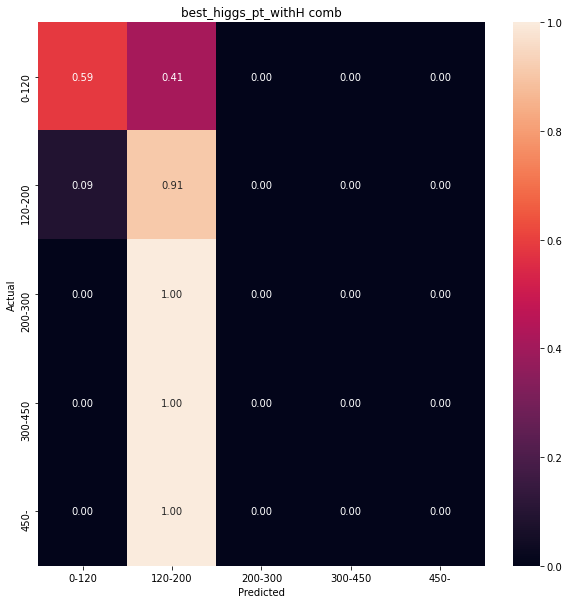

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(np.argmax(Y_test_01, axis=1), np.argmax(ypred, axis=1),labels=None, sample_weight=None,normalize=None)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('best_higgs_pt_withH comb')

plt.show(block=False)